In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
sns.set_style('whitegrid')
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_pickle('all_banks')
display(df.head())
bank_stocks = df

tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

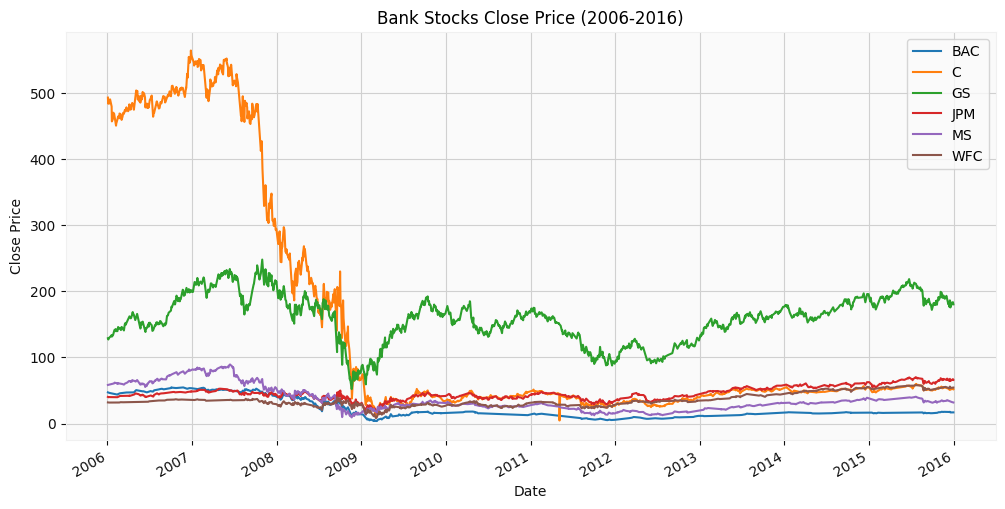

In [13]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,6))
plt.legend()
plt.title('Bank Stocks Close Price (2006-2016)')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.savefig('/content/drive/MyDrive/PortfolioProject/closing_price_linegraph.png')
plt.show()

In [ ]:
bac_data = bank_stocks['BAC']
display(bac_data.head())

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,46.92,47.18,46.15,47.08,16296700
2006-01-04,47.00,47.24,46.45,46.58,17757900
2006-01-05,46.58,46.83,46.32,46.64,14970900
2006-01-06,46.80,46.91,46.35,46.57,12599800
2006-01-09,46.72,46.97,46.36,46.60,15620000


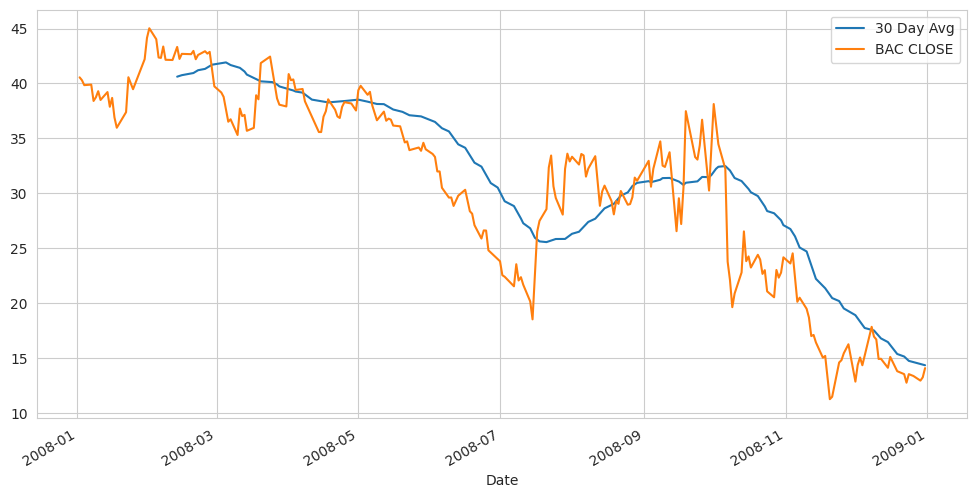

In [10]:
plt.figure(figsize=(12,6))
bac_data['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
bac_data['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

plt.savefig('/content/drive/MyDrive/PortfolioProject/30_day_avg_linegraph.png')

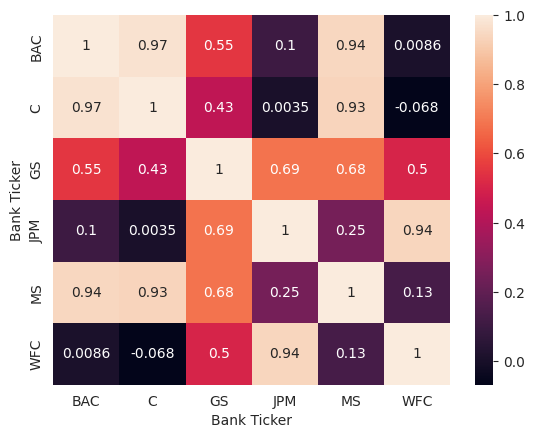

In [11]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

plt.savefig('/content/drive/MyDrive/PortfolioProject/corr_heatmap.png')

In [1]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.0 MB/s eta 0:00:00


In [15]:
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

df = pd.read_pickle('all_banks')
bank_stocks = df
bac_data = bank_stocks['BAC']

mpf.plot(
    bac_data.loc['2015-01-01':'2016-01-01'],
    type='candle',
    style='yahoo',
    title='BAC Candlestick Chart (2015-2016)',
    ylabel='Price ($)',
    ylabel_lower='Volume',
    volume=True,
    figscale=1.5,
    savefig='/content/drive/MyDrive/PortfolioProject/BAC_candlestick.png'
)
plt.show()